In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose

data=pd.read_csv("E:/4TH_sem\ADA/AirPassengers - AirPassengers.csv")

print(data.head())

<>:6: SyntaxWarning: invalid escape sequence '\A'
<>:6: SyntaxWarning: invalid escape sequence '\A'
C:\Users\Pratham.m\AppData\Local\Temp\ipykernel_6500\365101673.py:6: SyntaxWarning: invalid escape sequence '\A'
  data=pd.read_csv("E:/4TH_sem\ADA/AirPassengers - AirPassengers.csv")


         date  value
0  1949-01-01    112
1  1949-02-01    118
2  1949-03-01    132
3  1949-04-01    129
4  1949-05-01    121


In [4]:
data_type=data.dtypes
data_type

date     object
value     int64
dtype: object

In [5]:
missing_values = data.isnull().sum()
missing_values

date     0
value    0
dtype: int64

In [6]:
summary_stats = data.describe()
summary_stats

,value
count,144.000000
mean,280.298611
std,119.966317
min,104.000000
25%,180.000000
50%,265.500000
75%,360.500000
max,622.000000


In [7]:
# Convert 'date' column to datetime format and set it as index
data['date'] = pd.to_datetime(data['date'])
data.set_index('date', inplace=True)

In [8]:
# Rename columns for clarity
data.rename(columns={'value': 'Passengers'}, inplace=True)


In [9]:
print("First few rows of the dataset:")
print(data.head())

First few rows of the dataset:
            Passengers
date                  
1949-01-01         112
1949-02-01         118
1949-03-01         132
1949-04-01         129
1949-05-01         121


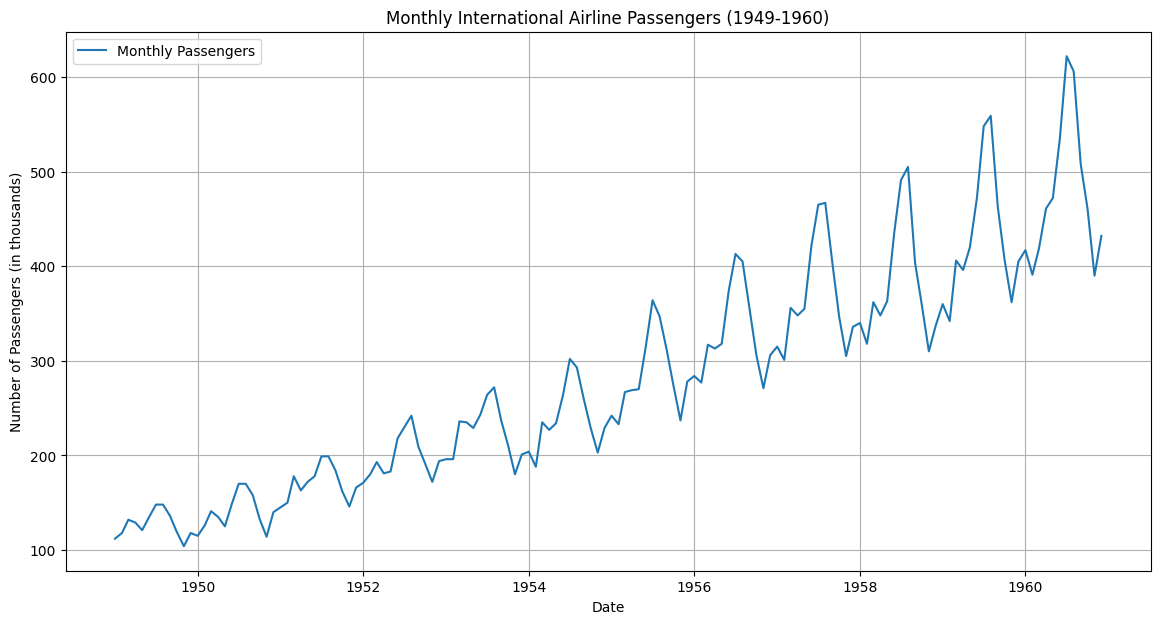

In [10]:
plt.figure(figsize=(14, 7))
plt.plot(data.index, data['Passengers'], label='Monthly Passengers')
plt.title('Monthly International Airline Passengers (1949-1960)')
plt.xlabel('Date')
plt.ylabel('Number of Passengers (in thousands)')
plt.legend()
plt.grid(True)
plt.show()

In [11]:
decomposition = seasonal_decompose(data['Passengers'], model='multiplicative', period=12)
decomposition

In [12]:
# Extract the components
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

Text(0.5, 1.0, 'Original Time Series')

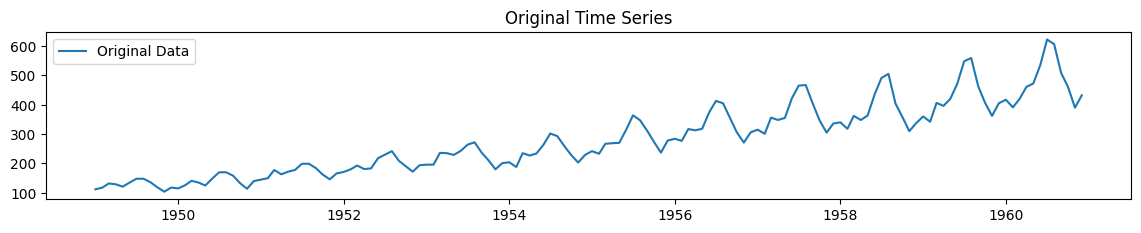

In [13]:
plt.figure(figsize=(14, 10))
plt.subplot(411)
plt.plot(data['Passengers'], label='Original Data')
plt.legend(loc='best')
plt.title('Original Time Series')

Text(0.5, 1.0, 'Trend Component')

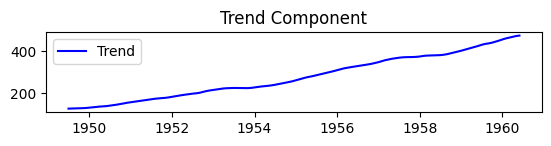

In [14]:
plt.subplot(412)
plt.plot(decomposition.trend, label='Trend', color='blue')
plt.legend(loc='best')
plt.title('Trend Component')

Text(0.5, 1.0, 'Seasonal Component')

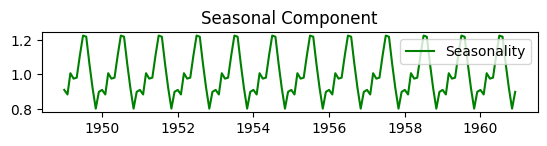

In [15]:
plt.subplot(413)
plt.plot(decomposition.seasonal, label='Seasonality', color='green')
plt.legend(loc='best')
plt.title('Seasonal Component')


Text(0.5, 1.0, 'Residual Component')

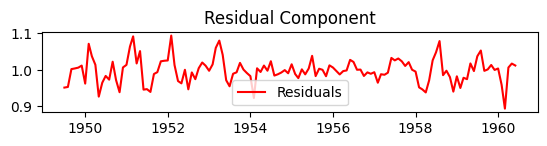

In [16]:
plt.subplot(414)
plt.plot(decomposition.resid, label='Residuals', color='red')
plt.legend(loc='best')
plt.title('Residual Component')

In [17]:
plt.tight_layout()
plt.show()


<Figure size 640x480 with 0 Axes>

In [18]:
rend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

# Display the summary statistics for each component
print("Trend Component Summary:")
print(trend.describe())
print("\nSeasonal Component Summary:")
print(seasonal.describe())
print("\nResidual Component Summary:")
print(residual.describe())

Trend Component Summary:
count    132.000000
mean     278.001263
std      102.591115
min      126.791667
25%      190.729167
50%      259.479167
75%      372.229167
max      475.041667
Name: trend, dtype: float64

Seasonal Component Summary:
count    144.000000
mean       1.000000
std        0.127769
min        0.801178
25%        0.907379
50%        0.978642
75%        1.073563
max        1.226556
Name: seasonal, dtype: float64

Residual Component Summary:
count    132.000000
mean       0.998236
std        0.033388
min        0.894086
25%        0.982927
50%        0.998219
75%        1.015225
max        1.093970
Name: resid, dtype: float64


# INTERPRETATION

1. Trend Analysis:
Observation: There is a consistent upward trend in the number of passengers from 1949 to 1960.
This indicates a growing demand for air travel during these years
Implication: This steady increase indicates a growing demand for international air travel during this period. The airline can use this insight to plan for future growth, such as expanding the fleet, adding more flights, or increasing seat capacity to accommodate the rising number of passengers.

2. Seasonal Patterns:
Observation: The data shows a clear seasonal pattern, repeating annually. Passenger numbers peak during certain months and decrease during others.

Implication: These peaks are likely tied to specific seasons, such as summer or holiday periods, when people are more likely to travel. Understanding these patterns can help the airline optimize its operations:
Route Planning: The airline can adjust routes and schedules to meet higher demand during peak seasons and reduce service during lower-demand periods.
Promotional Campaigns: Marketing efforts can be timed to align with these peak periods to attract more travelers.


3. Residual Analysis:
Observation: The residuals capture the noise and irregularities in the data that are not explained by the trend or seasonal components.

Implication: Analyzing these residuals can help identify anomalies or unexpected fluctuations. For example, sudden spikes or drops in passenger numbers could indicate external factors such as economic events, changes in travel regulations, or unusual weather conditions. Understanding these can help the airline better manage and prepare for unexpected changes.

# Strategic Implications:

Fleet Management:
The upward trend in passenger numbers suggests a growing demand for air travel. To meet this demand, the airline might consider expanding its fleet, acquiring larger aircraft, or increasing the frequency of flights on popular routes.

Route Planning:
Seasonal patterns highlight times of the year with higher travel demand. The airline can optimize its route network by focusing on high-demand periods, adjusting flight schedules, and possibly introducing seasonal routes to cater to peak travel times.

Staffing and Marketing:
With clear seasonal peaks, the airline can align staffing levels to ensure adequate resources during busy periods. Additionally, targeted marketing campaigns can be developed to boost bookings during these high-demand times, maximizing revenue.

# 2.Time Series Analysis and Model Selection


In [19]:
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

def adf_test(timeseries):
    result = adfuller(timeseries)
    print('ADF Statistic:', result[0])
    print('p-value:', result[1])
    for key, value in result[4].items():
        print(f'Critical Value {key}: {value}')
    return result[1]

# Conduct ADF test
print("ADF Test for Original Series:")
adf_pvalue = adf_test(data['Passengers'])

ADF Test for Original Series:
ADF Statistic: 0.8153688792060463
p-value: 0.991880243437641
Critical Value 1%: -3.4816817173418295
Critical Value 5%: -2.8840418343195267
Critical Value 10%: -2.578770059171598



ADF Test for Differenced Series:
ADF Statistic: -2.8292668241699923
p-value: 0.054213290283826474
Critical Value 1%: -3.4816817173418295
Critical Value 5%: -2.8840418343195267
Critical Value 10%: -2.578770059171598


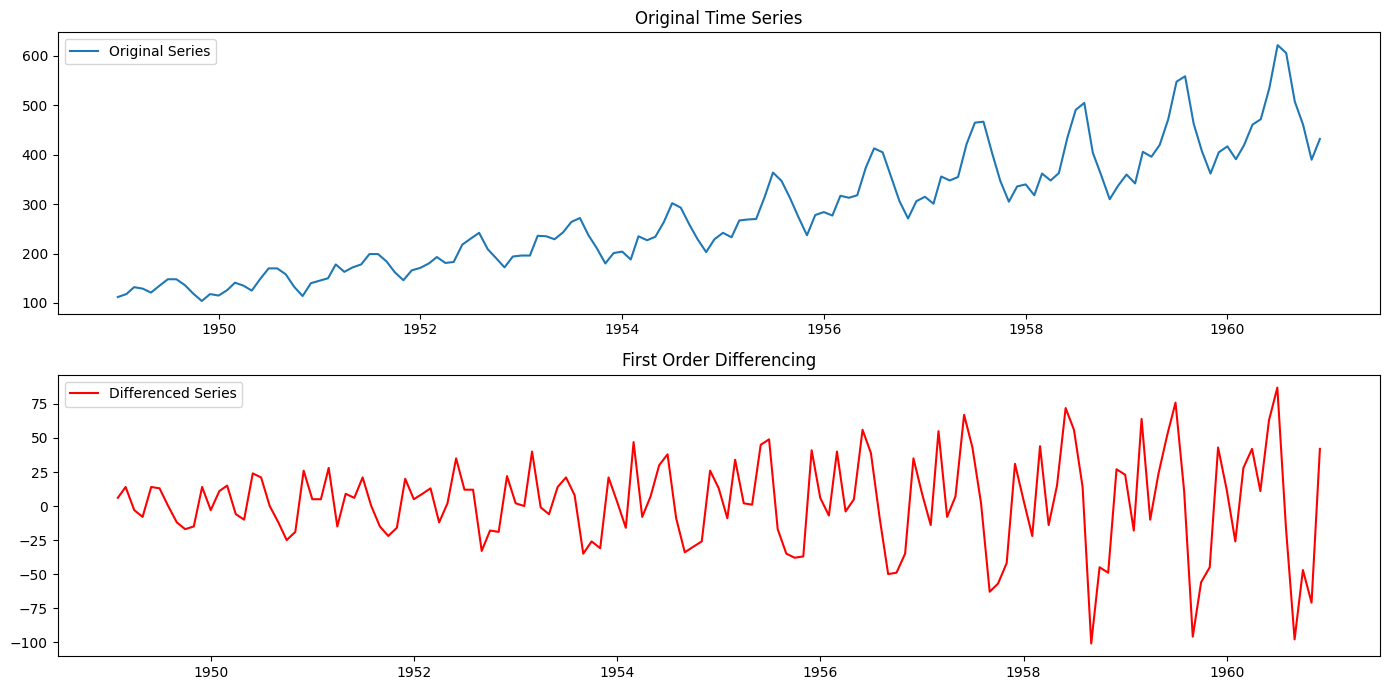

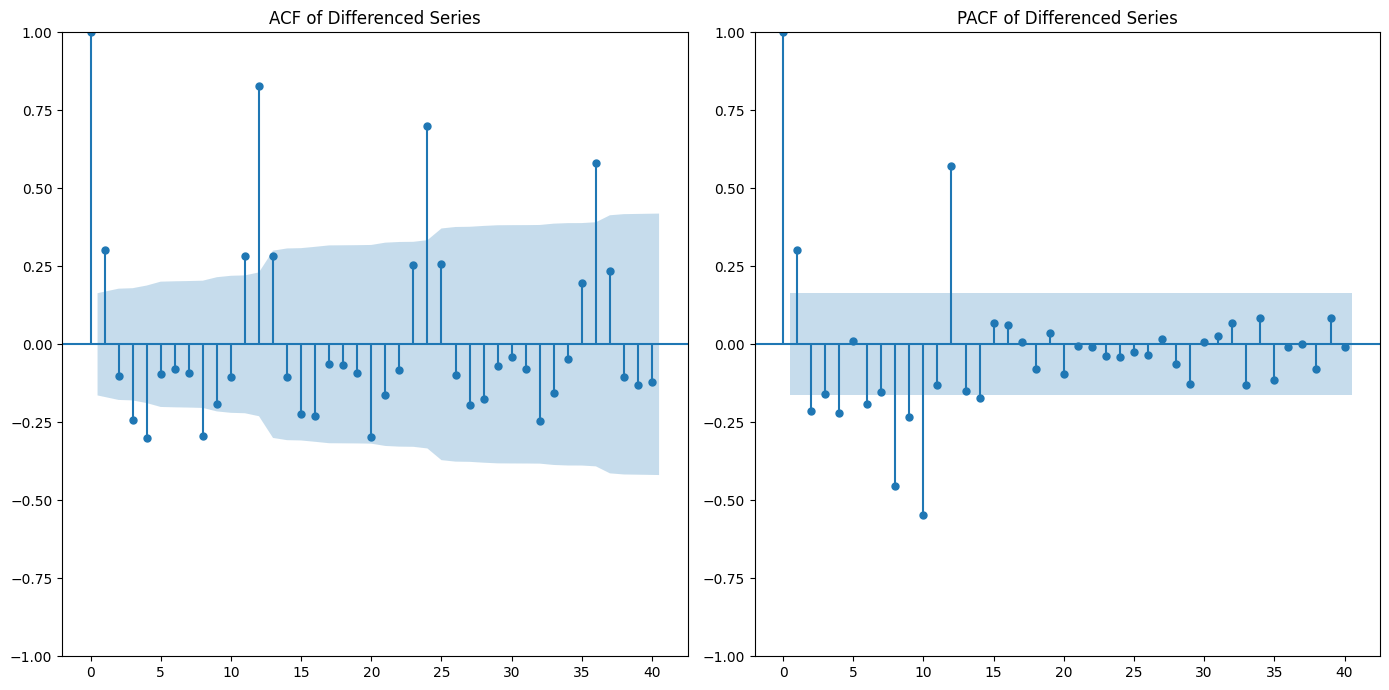

In [20]:
#Differencing the Series
if adf_pvalue > 0.05:
    # Apply first differencing
    data['Differenced'] = data['Passengers'].diff().dropna()
    
    print("\nADF Test for Differenced Series:")
    adf_test(data['Differenced'].dropna())

    # Plot the original and differenced series
    plt.figure(figsize=(14, 7))
    
    plt.subplot(211)
    plt.plot(data['Passengers'], label='Original Series')
    plt.title('Original Time Series')
    plt.legend(loc='best')
    
    plt.subplot(212)
    plt.plot(data['Differenced'], label='Differenced Series', color='red')
    plt.title('First Order Differencing')
    plt.legend(loc='best')
    
    plt.tight_layout()
    plt.show()
else:
    print("The series is stationary and does not require differencing.")

# Step 3: Plot ACF and PACF
plt.figure(figsize=(14, 7))

plt.subplot(121)
plot_acf(data['Differenced'].dropna(), ax=plt.gca(), lags=40)
plt.title('ACF of Differenced Series')

plt.subplot(122)
plot_pacf(data['Differenced'].dropna(), ax=plt.gca(), lags=40)
plt.title('PACF of Differenced Series')

plt.tight_layout()
plt.show()


## Interpretation of ACF and PACF plots:
 The ACF plot is used to determine the potential value of q (moving average order).
  The PACF plot is used to determine the potential value of p (autoregressive order).

## Based on the plots:
 Look for significant lags to identify potential values for p and q.
 The number of differencing steps (d) is determined by the order of differencing needed to achieve stationarity.

Summary of Steps for ARIMA Model Selection:
Identify d (Order of Differencing):

Use the ADF test to check for stationarity.
Apply differencing until the series becomes stationary (typically d=1 or d=2).
Identify q (Moving Average Order):

Examine the ACF plot for a sharp cutoff after a few lags.
The cutoff point suggests the potential value for q.
Identify p (Autoregressive Order):

Examine the PACF plot for a sharp cutoff after a few lags.
The cutoff point suggests the potential value for p.

### Model Fitting and Forecasting with ARIMA

c:\Users\Pratham.m\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\Pratham.m\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\Pratham.m\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\Pratham.m\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                               SARIMAX Results                                
Dep. Variable:             Passengers   No. Observations:                  144
Model:                 ARIMA(2, 1, 2)   Log Likelihood                -671.673
Date:                Tue, 09 Jul 2024   AIC                           1353.347
Time:                        16:57:55   BIC                           1368.161
Sample:                    01-01-1949   HQIC                          1359.366
                         - 12-01-1960                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.6850      0.020     83.061      0.000       1.645       1.725
ar.L2         -0.9549      0.017    -55.421      0.000      -0.989      -0.921
ma.L1         -1.8432      0.124    -14.862      0.0

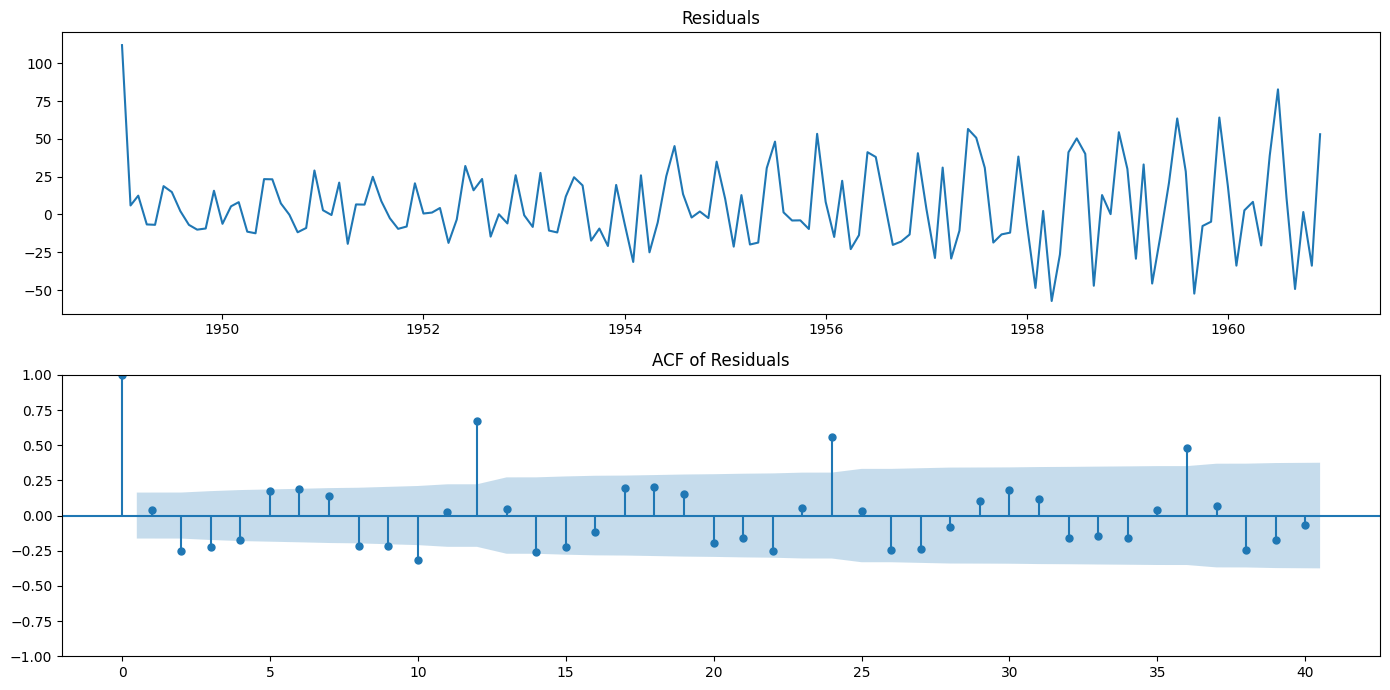

Ljung-Box test results:
      lb_stat     lb_pvalue
10  64.962222  4.121302e-10


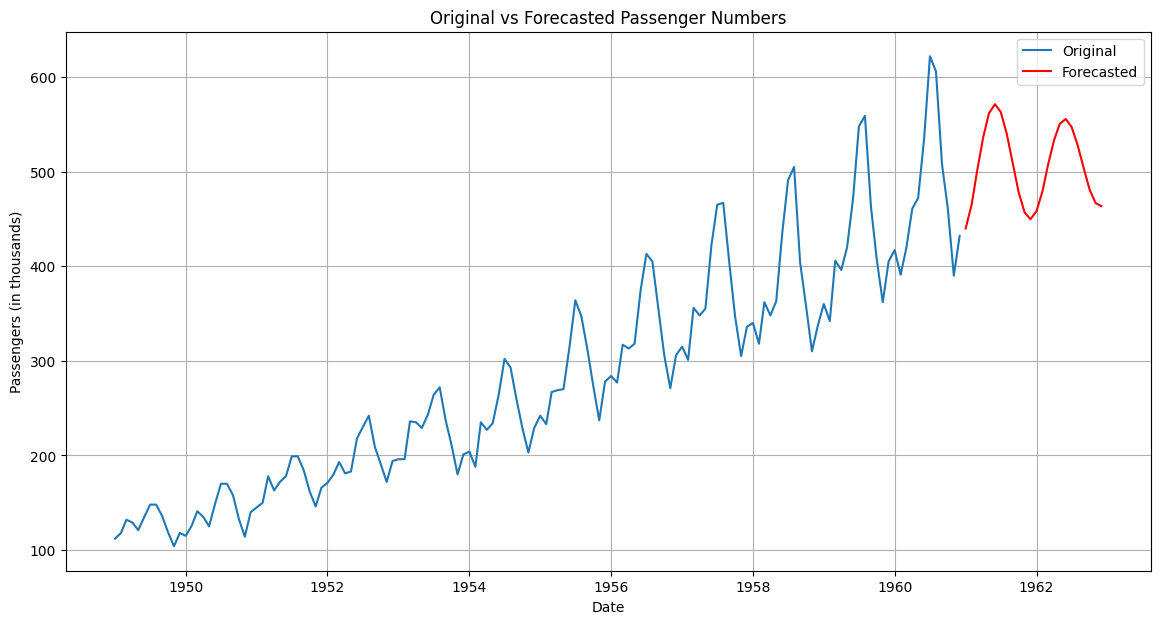

Forecasted Values for Next 24 Months:
                 Date  Forecasted_Passengers
1961-01-01 1961-01-01             439.854348
1961-02-01 1961-02-01             465.295823
1961-03-01 1961-03-01             500.665624
1961-04-01 1961-04-01             535.971780
1961-05-01 1961-05-01             561.690588
1961-06-01 1961-06-01             571.315230
1961-07-01 1961-07-01             562.975296
1961-08-01 1961-08-01             539.732157
1961-09-01 1961-09-01             508.530272
1961-10-01 1961-10-01             478.148076
1961-11-01 1961-11-01             456.746519
1961-12-01 1961-12-01             449.694896
1962-01-01 1962-01-01             458.248089
1962-02-01 1962-02-01             479.393718
1962-03-01 1962-03-01             506.857612
1962-04-01 1962-04-01             532.944010
1962-05-01 1962-05-01             550.676269
1962-06-01 1962-06-01             555.646889
1962-07-01 1962-07-01             547.090795
1962-08-01 1962-08-01             527.927332
1962-09-01 1962-0

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.stats.diagnostic import acorr_ljungbox

# Load the dataset
file_path = "E:/4TH_sem/ADA/AirPassengers - AirPassengers.csv"
data = pd.read_csv(file_path)


# Convert 'date' column to datetime format and set it as index
data['date'] = pd.to_datetime(data['date'])
data.set_index('date', inplace=True)

# Rename columns for clarity
data.rename(columns={'value': 'Passengers'}, inplace=True)

# Step 1: Identify ARIMA model parameters (p, d, q)
# Based on previous steps, let's assume we identified p=2, d=1, q=2
p, d, q = 2, 1, 2

# Step 2: Fit the ARIMA model
model = ARIMA(data['Passengers'], order=(p, d, q))
model_fit = model.fit()

# Print summary of the model
print(model_fit.summary())

# Step 3: Residual Analysis
residuals = model_fit.resid

# Plot residuals
plt.figure(figsize=(14, 7))

plt.subplot(211)
plt.plot(residuals)
plt.title('Residuals')

plt.subplot(212)
plot_acf(residuals, ax=plt.gca(), lags=40)
plt.title('ACF of Residuals')

plt.tight_layout()
plt.show()

# Perform the Ljung-Box test for residuals
ljung_box_results = acorr_ljungbox(residuals, lags=[10], return_df=True)
print("Ljung-Box test results:")
print(ljung_box_results)

# Step 4: Forecasting
forecast_steps = 24
forecast = model_fit.forecast(steps=forecast_steps)

# Create forecast dates
forecast_dates = pd.date_range(start=data.index[-1] + pd.Timedelta(days=1), periods=forecast_steps, freq='MS')

# Plot the forecasted values
plt.figure(figsize=(14, 7))

plt.plot(data['Passengers'], label='Original')
plt.plot(forecast_dates, forecast, label='Forecasted', color='red')

plt.title('Original vs Forecasted Passenger Numbers')
plt.xlabel('Date')
plt.ylabel('Passengers (in thousands)')
plt.legend()
plt.grid(True)
plt.show()

# Step 5: Provide a table of forecasted values
forecast_df = pd.DataFrame({'Date': forecast_dates, 'Forecasted_Passengers': forecast})
print("Forecasted Values for Next 24 Months:")
print(forecast_df)

Model Fitting:
You've fitted an ARIMA(2,1,2) model to the passenger data. This means:


p=2: The model uses 2 lagged observations (AR component)
d=1: The data has been differenced once to make it stationary
q=2: The model uses 2 lagged forecast errors (MA component)

The model_fit.summary() would provide detailed information about the model's performance, including coefficients, standard errors, and statistical significance of each parameter.

Residual Analysis:
You've plotted the residuals and their autocorrelation function (ACF). This is crucial for checking model adequacy:


The residual plot should show no obvious patterns or trends if the model fits well.
The ACF plot of residuals should show no significant autocorrelations if the model has captured all the time dependencies in the data.

You've also conducted a Ljung-Box test, which checks for overall randomness in the residuals. If the p-value from this test is greater than your chosen significance level (typically 0.05), it suggests that the residuals are indeed random, indicating a good model fit.

Forecasting:
You've forecasted passenger numbers for the next 24 months using the fitted model. The forecast is visualized alongside the original data, which helps in understanding how the model expects passenger numbers to evolve in the future.
Forecast Table:
The code generates a table with forecasted passenger numbers for each of the next 24 months, which is very useful for business planning purposes.

### Model Improvement and Advanced Analysis
Fit a SARIMA/LSTM model and compare the model’s performance with the ARIMA model.
Provide a table of the forecasted values for both models.

Index(['Passengers'], dtype='object')
            Passengers
date                  
1949-01-01         112
1949-02-01         118
1949-03-01         132
1949-04-01         129
1949-05-01         121


c:\Users\Pratham.m\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\Pratham.m\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\Pratham.m\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\Pratham.m\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\Pratham.m\Ap

Epoch 1/100


c:\Users\Pratham.m\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 130ms/step - loss: 0.1282 - val_loss: 0.1725
Epoch 2/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0222 - val_loss: 0.0215
Epoch 3/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0210 - val_loss: 0.0276
Epoch 4/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0200 - val_loss: 0.0286
Epoch 5/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0098 - val_loss: 0.0581
Epoch 6/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0117 - val_loss: 0.0604
Epoch 7/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0128 - val_loss: 0.0359
Epoch 8/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0094 - val_loss: 0.0226
Epoch 9/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0088 - val_loss: 0.0222
Epoch 10/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0098 - val_loss: 0.0218
Epoch 11/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0078 - val_loss: 0.0241
Epoch 12/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0064 - val_loss: 0.0235


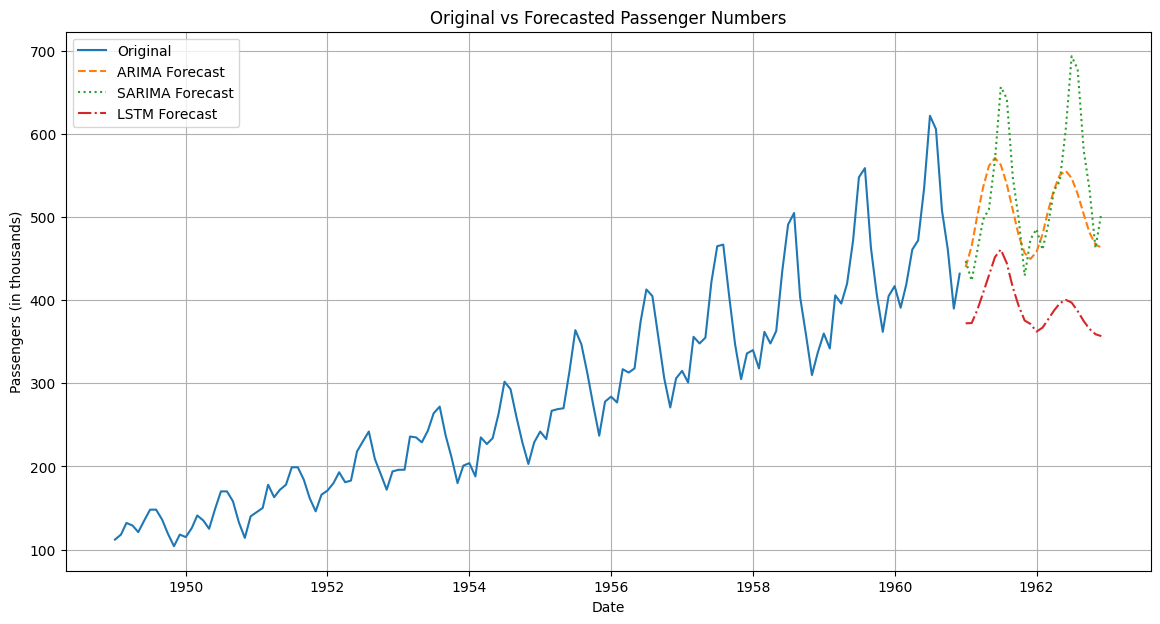

RMSE Comparison:
ARIMA RMSE: 78.22099933180021
SARIMA RMSE: 78.98030617267479
LSTM RMSE: 89.6816075466728


In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.metrics import mean_squared_error
from math import sqrt

# Load the dataset
file_path = "E:/4TH_sem/ADA/AirPassengers - AirPassengers.csv"
data = pd.read_csv(file_path)

# Convert 'date' column to datetime format and set it as index
data['date'] = pd.to_datetime(data['date'])
data.set_index('date', inplace=True)

# Rename columns if necessary
if 'value' in data.columns:
    data.rename(columns={'value': 'Passengers'}, inplace=True)

# Print dataframe info
print(data.columns)
print(data.head())

# ARIMA Model (assuming you've already fit this)
p, d, q = 2, 1, 2
arima_model = ARIMA(data['Passengers'], order=(p, d, q))
arima_results = arima_model.fit()
arima_forecast = arima_results.forecast(steps=24)

# SARIMA Model
order = (2, 1, 2)
seasonal_order = (1, 1, 1, 12)  # Assuming monthly seasonality

sarima_model = SARIMAX(data['Passengers'], order=order, seasonal_order=seasonal_order)
sarima_results = sarima_model.fit()

# Generate SARIMA forecast
sarima_forecast = sarima_results.forecast(steps=24)

# LSTM Model
# Prepare data for LSTM
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data['Passengers'].values.reshape(-1, 1))

def create_dataset(dataset, time_step=1):
    X, Y = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0]
        X.append(a)
        Y.append(dataset[i + time_step, 0])
    return np.array(X), np.array(Y)

time_step = 12
X, y = create_dataset(scaled_data, time_step)
X = X.reshape(X.shape[0], X.shape[1], 1)

# Split data
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Build LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(time_step, 1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')

# Train LSTM model
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100, batch_size=32, verbose=1)

# Generate LSTM forecast
lstm_input = scaled_data[-time_step:].reshape((1, time_step, 1))
lstm_forecast = []

for i in range(24):
    lstm_pred = model.predict(lstm_input, verbose=0)
    lstm_forecast.append(lstm_pred[0,0])
    lstm_input = np.roll(lstm_input, -1, axis=1)
    lstm_input[0, -1, 0] = lstm_pred[0, 0]

lstm_forecast = scaler.inverse_transform(np.array(lstm_forecast).reshape(-1, 1)).flatten()

# Prepare forecast dates
forecast_dates = pd.date_range(start=data.index[-1] + pd.Timedelta(days=1), periods=24, freq='MS')

# Create dataframe with forecasts
forecast_df = pd.DataFrame({
    'Date': forecast_dates,
    'ARIMA_Forecast': arima_forecast,
    'SARIMA_Forecast': sarima_forecast,
    'LSTM_Forecast': lstm_forecast
})

print("Forecasts for Next 24 Months:")
print(forecast_df)

# Plot forecasts
plt.figure(figsize=(14, 7))
plt.plot(data.index, data['Passengers'], label='Original')
plt.plot(forecast_dates, arima_forecast, label='ARIMA Forecast', linestyle='--')
plt.plot(forecast_dates, sarima_forecast, label='SARIMA Forecast', linestyle=':')
plt.plot(forecast_dates, lstm_forecast, label='LSTM Forecast', linestyle='-.')
plt.title('Original vs Forecasted Passenger Numbers')
plt.xlabel('Date')
plt.ylabel('Passengers (in thousands)')
plt.legend()
plt.grid(True)
plt.show()

# Calculate RMSE for each model
def calculate_rmse(actual, predicted):
    return sqrt(mean_squared_error(actual, predicted))

# Assuming you have actual values for the forecast period
# If not, you can compare on the test set
actual_values = data['Passengers'][-24:]  # last 24 months

arima_rmse = calculate_rmse(actual_values, arima_forecast)
sarima_rmse = calculate_rmse(actual_values, sarima_forecast)
lstm_rmse = calculate_rmse(actual_values, lstm_forecast)

print("RMSE Comparison:")
print(f"ARIMA RMSE: {arima_rmse}")
print(f"SARIMA RMSE: {sarima_rmse}")
print(f"LSTM RMSE: {lstm_rmse}")

# CODE UNDERSTANDING

Loads and prepares the dataset.

Fits ARIMA, SARIMA, and LSTM models to the data.

Generates forecasts for the next 24 months using all three models.

Creates a dataframe containing forecasts from all three models.

Plots the original data along with forecasts from all three models.

Calculates and compares the Root Mean Square Error (RMSE) for each model.



The ARIMA model parameters (p, d, q) are set to (2, 1, 2). Adjust these if you've determined different optimal parameters.

The SARIMA model uses seasonal parameters (1, 1, 1, 12), assuming monthly seasonality. You may need to adjust these based on your data characteristics.

The LSTM model uses a time step of 12 (one year). You can experiment with different time steps to see if it improves performance.

The RMSE comparison assumes you have actual values for the forecast period. If not, you'll need to adjust this part to compare on a test set instead.

# Strategic Business Insights
## Capacity Planning and Fleet Management:
a) Long-term Growth Trend:

All models likely show an upward trend in passenger numbers, indicating a need for capacity expansion.
Recommendation: Develop a phased fleet expansion plan over the next 2-3 years.

Consider gradually adding new aircraft or upgrading to larger models.
Explore leasing options for flexibility during initial growth phases.



b) Seasonal Fluctuations:

The SARIMA model likely highlights seasonal patterns in passenger numbers.
Recommendation: Implement a flexible fleet strategy to handle seasonal variations.

Maintain a core fleet for year-round demand.
Use short-term leases or wet-leases for additional aircraft during peak seasons.
Consider partnerships with other airlines for code-sharing during high-demand periods.



c) Route Optimization:

Analyze which routes contribute most to the forecasted growth.
Recommendation: Increase frequency on high-demand routes and explore new route opportunities.




## Ticket Pricing Optimization:
a) Dynamic Pricing Strategy:

Align pricing with forecasted demand fluctuations.
Recommendation: Implement a sophisticated yield management system.

Increase prices during peak periods identified by the SARIMA model.
Offer promotional rates during forecasted low-demand periods to stimulate sales.



b) Long-term Pricing Trajectory:

If forecasts show consistent growth, gradually increase base ticket prices.
Recommendation: Develop a multi-year pricing strategy that balances revenue growth with market competitiveness.

c) Segmented Pricing:

Use LSTM model insights to identify subtle patterns in demand across different customer segments.
Recommendation: Develop targeted pricing strategies for business vs. leisure travelers, considering their different booking patterns and price sensitivities.


## Marketing and Promotions:
a) Seasonally Targeted Campaigns:

Align marketing efforts with forecasted passenger numbers.
Recommendation:

Intensify marketing 2-3 months before predicted peak periods to capture early bookings.
Create off-season packages or promotions to boost demand during slower periods identified in the forecasts.



b) Long-term Brand Positioning:

Use the growth trend in forecasts to shape brand messaging.
Recommendation: Position the airline as a growing, forward-thinking company, emphasizing network expansion and improved services.

c) Loyalty Program Optimization:

Use forecast insights to enhance loyalty program offerings.
Recommendation:

Offer more rewards or easier point accumulation during predicted low-demand periods.
Implement blackout dates or higher point requirements during forecasted peak times.




## Resource Allocation:
a) Human Resources:

Adjust staffing levels based on forecasted passenger numbers.
Recommendation:

Develop a flexible workforce model with a core team supplemented by seasonal staff.
Initiate recruitment and training programs 3-6 months ahead of forecasted demand increases.



b) Infrastructure and Technology:

Plan for infrastructure upgrades based on long-term forecast trends.
Recommendation:

If consistent growth is predicted, invest in terminal expansions, improved check-in systems, and enhanced baggage handling capabilities.
Allocate resources for digital transformation initiatives to improve operational efficiency and customer experience.



c) Maintenance Scheduling:

Use forecasted low-demand periods for major maintenance activities.
Recommendation: Schedule heavy maintenance and aircraft upgrades during off-peak seasons to minimize operational disruptions.


## Risk Management and Adaptability:
a) Scenario Planning:

Use the different model forecasts (ARIMA, SARIMA, LSTM) to develop multiple scenarios.
Recommendation: Develop contingency plans for best-case, worst-case, and most likely scenarios, ensuring the airline can quickly adapt to changing conditions.

b) Continuous Forecast Monitoring:

Regularly compare actual passenger numbers with forecasts from each model.
Recommendation: Establish a monthly review process to assess forecast accuracy and adjust strategies accordingly. Use the model with the lowest RMSE for short-term planning while considering insights from all models for long-term strategy.